In [3]:
import pandas as pd

In [9]:
df = pd.read_csv("C:/Users/91991/Downloads/archive (1)/train.csv")

In [11]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
# data cleaning 
Cat_col = ['Gender', 'Education', 'Self_Employed', 'Married', 'property_area', 'Loan_status']
Num_col = ['Loan_ID', 'Dependents', 'ApplicantIncome', 'Coapplicantincome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
Cat_col = ['Gender', 'Self_Employed', 'Married', 'Dependents']
Num_col = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [49]:
for x in Cat_col:
    mode_val = df[x].mode()[0]
    df[x].fillna(mode_val, inplace=True)
    print(f"Filled missing values in {x} with mode: {mode_val}")

Filled missing values in Gender with mode: Male
Filled missing values in Self_Employed with mode: No
Filled missing values in Married with mode: Yes
Filled missing values in Dependents with mode: 0


In [59]:
for x in Num_col:
    df[x] = pd.to_numeric(df[x], errors= 'coerce')
    mean_val = df[x].mean()
    df[x] = df[x].fillna(mean_val)
    print(f"Filled missing values in {x} with mean: {mean_val}")
    

Filled missing values in LoanAmount with mean: 146.41216216216216
Filled missing values in Loan_Amount_Term with mean: 342.0
Filled missing values in Credit_History with mean: 0.8421985815602836


In [61]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings 

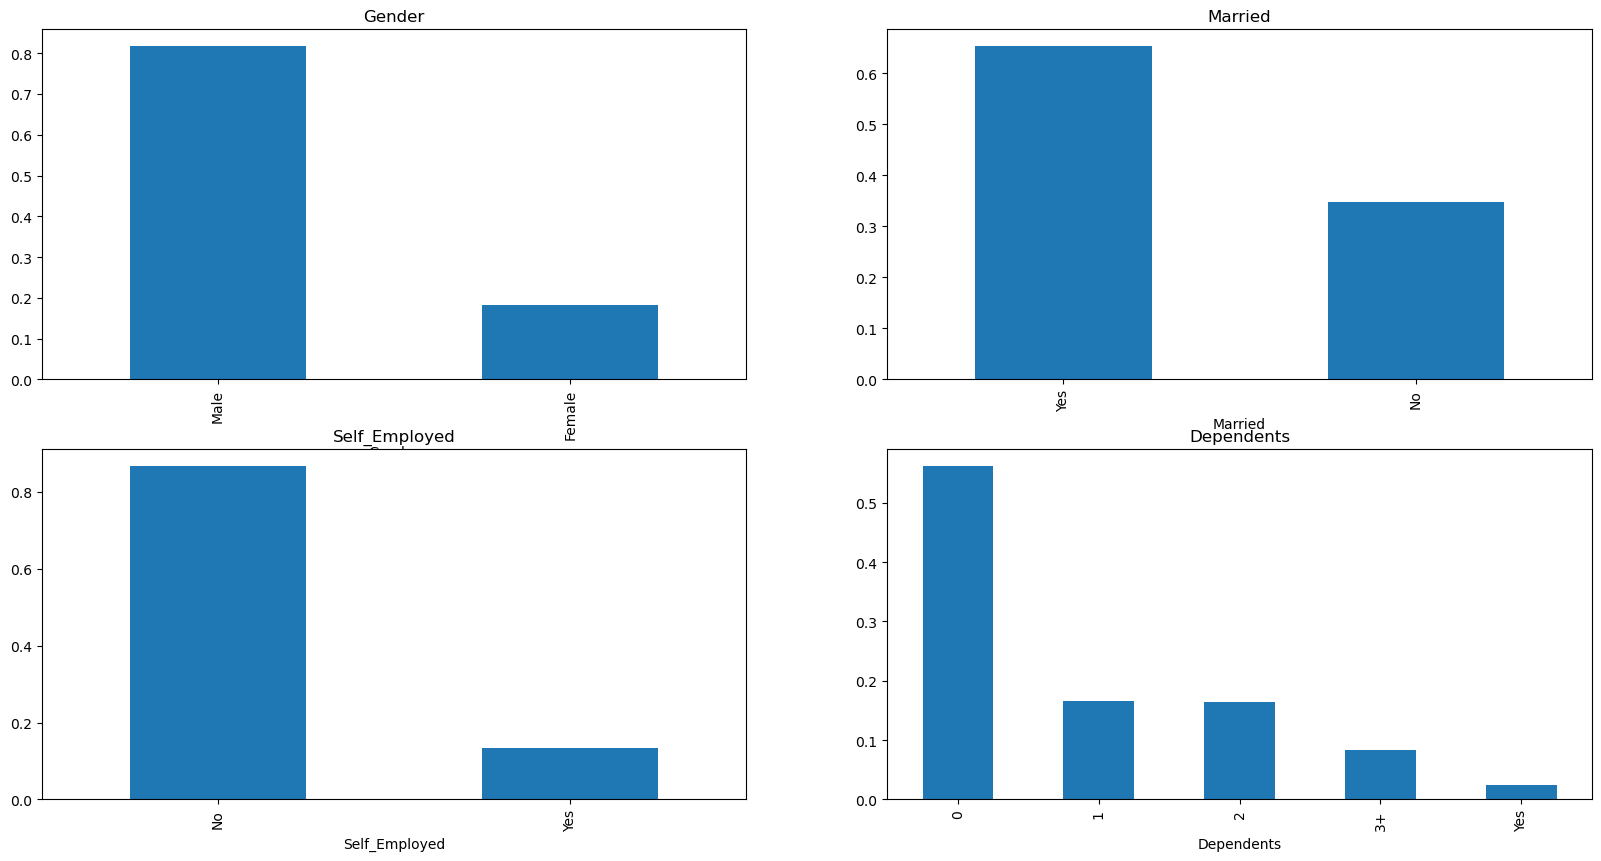

In [71]:
plt.figure(1)
plt.subplot(221) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 
plt.show()

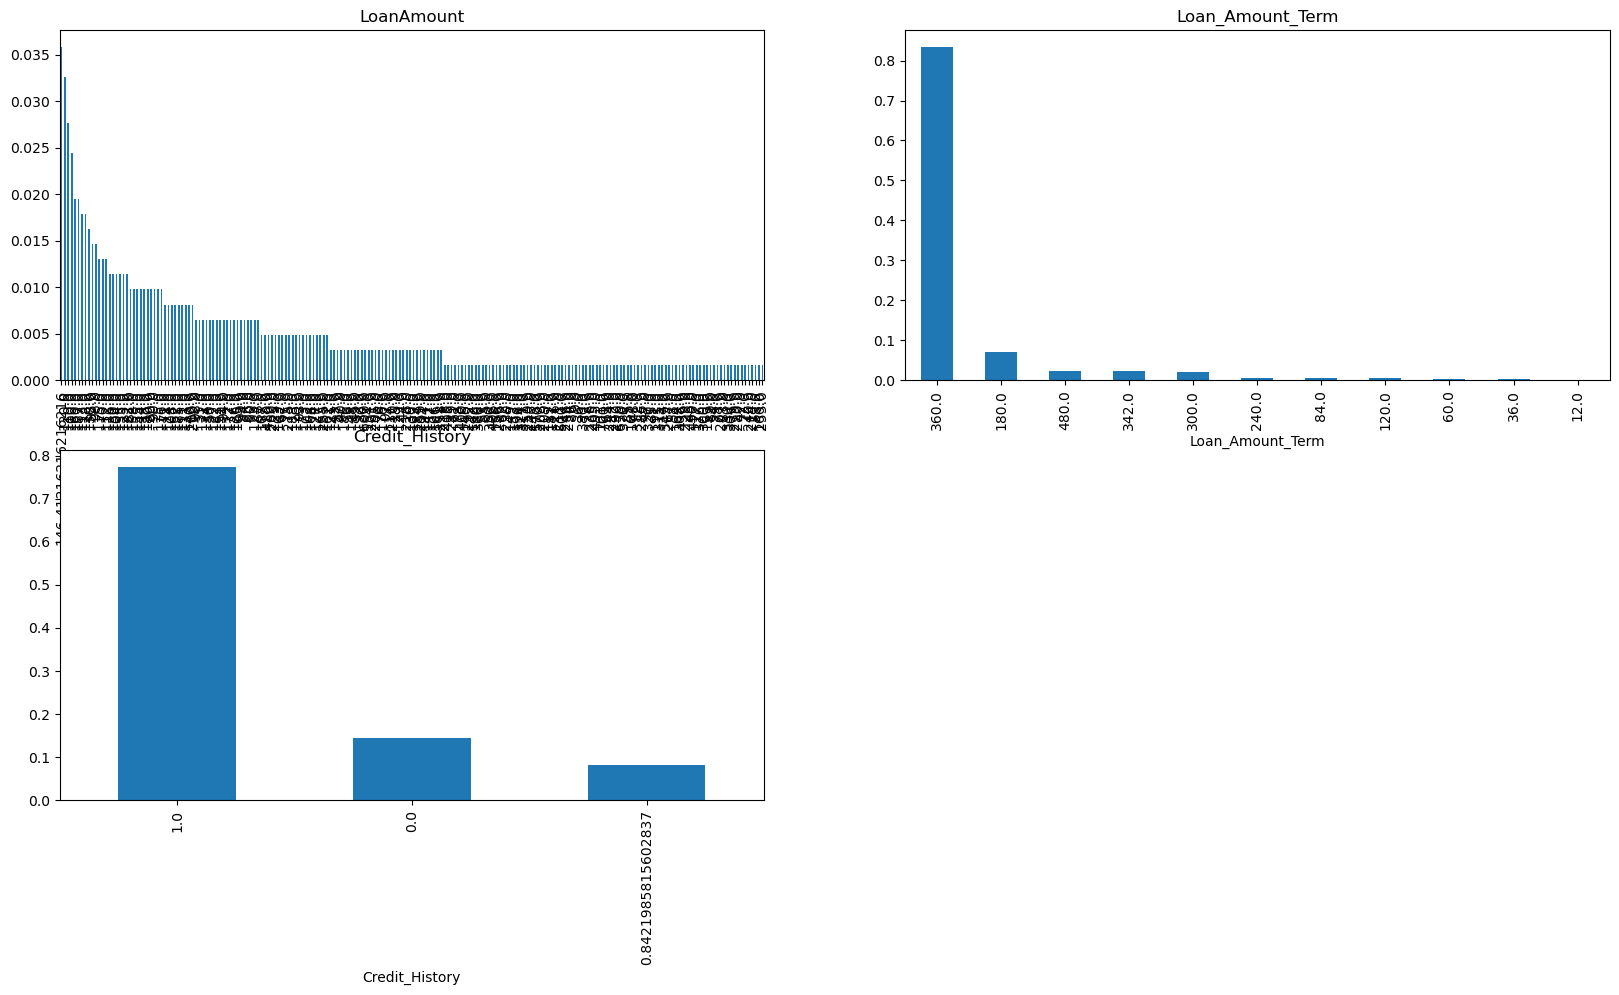

In [73]:
plt.figure(1)
plt.subplot(221) 
df['LoanAmount'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'LoanAmount') 
plt.subplot(222) 
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term') 
plt.subplot(223) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

C:\Users\91991\AppData\Local\Temp\ipykernel_15592\1839489775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome']);


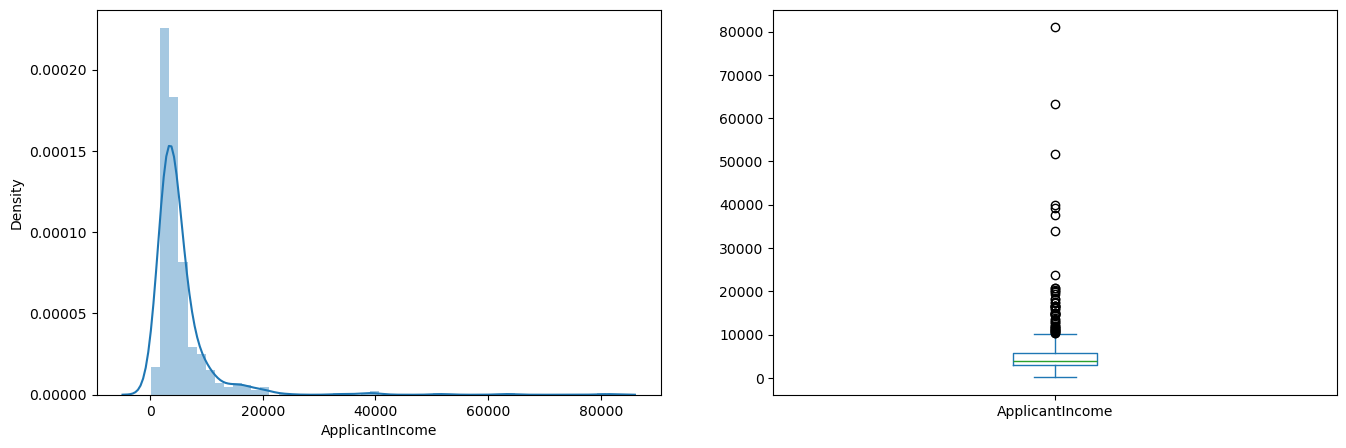

In [85]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(df['ApplicantIncome']);
plt.subplot(122) 
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

C:\Users\91991\AppData\Local\Temp\ipykernel_15592\1155320618.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount']);


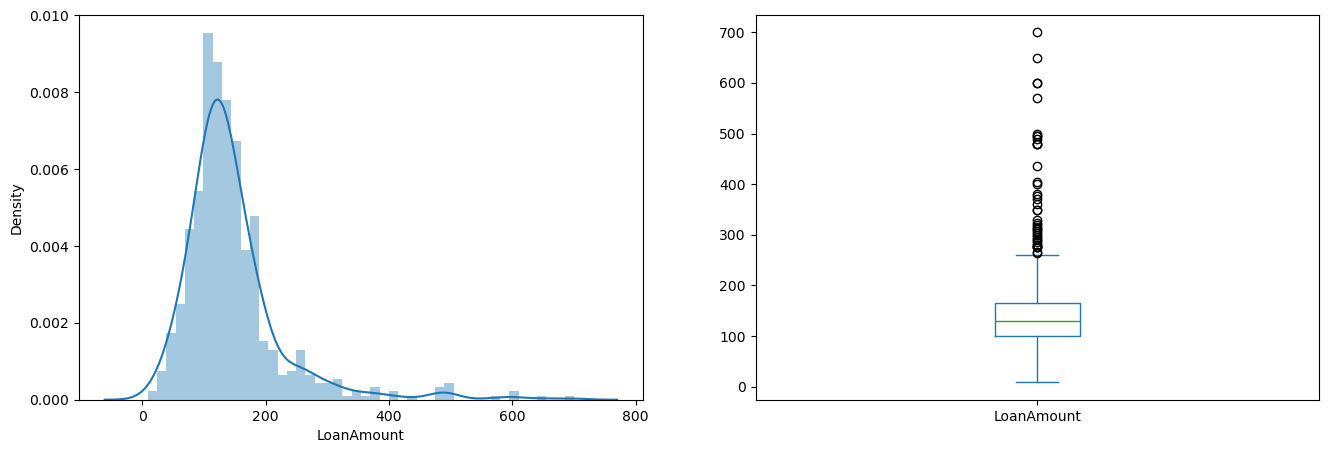

In [91]:
plt.figure(1)
plt.subplot(121)
df1=df.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

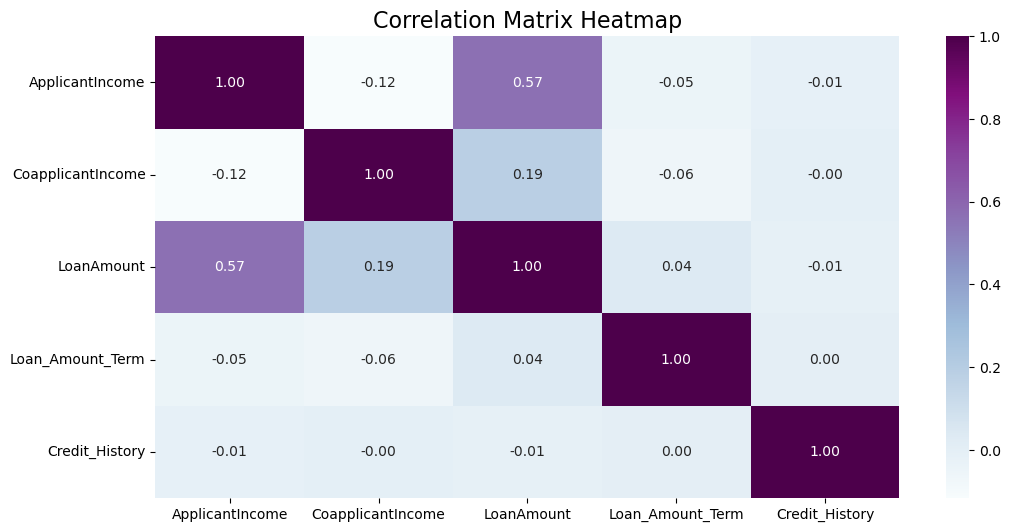

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
 
# Compute and visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(
    numeric_df.corr(),  # Correlation matrix of numeric columns
    cmap='BuPu',
    annot=True,
    fmt='.2f'
)
 
# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()